In [1]:
#import statements
import pandas as pd
import requests
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import seaborn as sns

In [2]:
sns.__version__

'0.8.1'

In [3]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 286kB 7.8MB/s ta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.8MB/s eta 0:00:01  5% |█▉                              | 665kB 10.4MB/s eta 0:00:02    26% |████████▌                       | 3.1MB 23.2MB/s eta 0:00:01    94% |██████████████████████████████▍ | 11.0MB 26.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01 0% |▏                               | 71kB 22.3MB/s eta 0:00:01    10% |███▎                            | 1.4MB 25.7MB/s eta 0:00:01    29% |█████████▌                      | 4.0MB 25.8MB/s eta 0:00:01    39% |████████████▌                   | 5.3MB 25.7MB/s eta 0:00:01    67% |█████████████████████▋          | 9.1MB 27.0MB/s eta 0:00:01    86% |███████████████████████████▋    | 11.6MB 26.9MB/s eta 0:00:01
    100% |████████████████████████████████| 3.0MB 8.9MB/s eta 0:00:01    15% |█████                           | 471kB 21.5MB/s eta 0:00:01
    100% |█████████████████████████

# Gather

In [4]:
#read twitter archive csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
len(twitter_archive)//100

23

In [6]:
#read tsv file with image predictions, column values separated with tab
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions  = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#Create an api object to gather the data
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
# Go through CSV, row by row and get Id from row and then make API call
# Try to make the Api call in 1 bulk or few bulk calls 
tweet_ID = ['666020888022790149','666029285002620928']
tweet_json = api.statuses_lookup(tweet_ID)
# Write tweet_json into a file, append to end of file as a new line (Step 3)
print(tweet_json)

[{'created_at': 'Sun Nov 15 22:32:08 +0000 2015', 'id': 666020888022790149, 'id_str': '666020888022790149', 'text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 6

In [8]:
favorite_count = []
retweet_count = []
for tweet in tweet_json:
    favorite_count.append(tweet['favorite_count'])
    retweet_count.append(tweet['retweet_count'])
    

In [9]:
tweet_df = pd.DataFrame({
    'tweet_ID': tweet_ID,
    'favorite_count': favorite_count,
    'retweet_count': retweet_count
})
tweet_df

,tweet_ID,favorite_count,retweet_count
0,666020888022790149,2336,441
1,666029285002620928,117,41


In [10]:
tweet_df = pd.DataFrame(
    columns=['tweet_ID', 'favorite_count', 'retweet_count']
)
# Go through CSV, row by row and get Id from row and then make API call
# Try to make the Api call in 1 bulk or few bulk calls 
for i in range(len(twitter_archive)//80):
    tweet_ID = list(twitter_archive.loc[i*80:(i+1)*80,'tweet_id'].astype(str))
    tweet_json = api.statuses_lookup(tweet_ID)
    favorite_count = []
    retweet_count = []
    ids = [] 
    # Write tweet_json into a file, append to end of file as a new line
    for tweet in tweet_json:
        favorite_count.append(tweet['favorite_count'])
        retweet_count.append(tweet['retweet_count'])
        ids.append(tweet['id'])
    tweet_df = pd.concat([tweet_df,pd.DataFrame({
        'tweet_ID': ids,
        'favorite_count': favorite_count,
        'retweet_count': retweet_count
        
    })],ignore_index=True)
tweet_df

,tweet_ID,favorite_count,retweet_count
0,886366144734445568,19110,2734
1,877611172832227328,0,70
2,888078434458587136,19727,3006
3,891689557279858688,38076,7488
4,879492040517615616,21307,2746
5,878604707211726852,27205,6142
6,879674319642796034,286,10
7,884876753390489601,25150,4839
8,882992080364220416,21620,3353
9,889880896479866881,25279,4316


## Gather Summary
- Obtained twitter archive csv
- Downloaded image_predictions.tsv using requests
- Queried Twitter API data using Tweepy

# Assess

In [11]:
#Assess twitter
twitter_archive.info()
twitter_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [15]:
#assess image predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#assess image predictions
image_predictions.info()
image_predictions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#Assess tweet_df
tweet_df.info()
tweet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
tweet_ID          2324 non-null object
favorite_count    2324 non-null object
retweet_count     2324 non-null object
dtypes: object(3)
memory usage: 54.5+ KB


,tweet_ID,favorite_count,retweet_count
0,886366144734445568,19110,2734
1,877611172832227328,0,70
2,888078434458587136,19727,3006
3,891689557279858688,38076,7488
4,879492040517615616,21307,2746


In [18]:
# Find the number of images with invalid dog data
not_dogs = list(image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')['jpg_url'].sample(49))
len(not_dogs)

49

## Quality
- The reply and retweet columns can be deleted
- A handful of the columns can be dropped
- Favorite_count, retweet_count, and timestamp are incorrect datatypes
- The source column can be simplified
- Some of the names are inaccurate and feature words like "a", "an", "the", "very"
- Some of the names aren't capitalized
- rating_denominator has values that are different from 10
- The numerators have outliers.

##  Tidiness
-  All 3 tables should merge
- In twitter_archive doggo, floofer, pupper, and puppo should be combined into one column called stage
- In twitter_archive rating_denominator and rating_numerator can combine


# Clean

##  Tidiness 1: Merge the Dataframes

In [19]:
#taking a copy from all 3 dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()


In [20]:
#Make tweet_ids for all 3 DataFrames into strings
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str).str.replace('/',' ')
twitter_archive['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [21]:
#Turn tweet_id into string
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str).str.replace('/',' ')
image_predictions_clean['tweet_id']

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2045    886366144734445568
2046    886680336477933568
2047    886736880519319552
2048    886983233522544640
2049    887101392804085760
2050    887343217045368832
2

In [22]:
#rename tweet_ID to tweet_id
tweet_df_clean = tweet_df_clean.rename(columns={"tweet_ID": "tweet_id"})
tweet_df_clean.head()

,tweet_id,favorite_count,retweet_count
0,886366144734445568,19110,2734
1,877611172832227328,0,70
2,888078434458587136,19727,3006
3,891689557279858688,38076,7488
4,879492040517615616,21307,2746


In [23]:
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str).str.replace('/',' ')
tweet_df_clean['tweet_id']

0       886366144734445568
1       877611172832227328
2       888078434458587136
3       891689557279858688
4       879492040517615616
5       878604707211726852
6       879674319642796034
7       884876753390489601
8       882992080364220416
9       889880896479866881
10      885518971528720385
11      879862464715927552
12      877556246731214848
13      890971913173991426
14      890006608113172480
15      880935762899988482
16      891815181378084864
17      886267009285017600
18      889278841981685760
19      879415818425184262
20      882268110199369728
21      880465832366813184
22      887101392804085760
23      884162670584377345
24      879376492567855104
25      885528943205470208
26      878776093423087618
27      880872448815771648
28      885984800019947520
29      881633300179243008
               ...        
2294    667902449697558528
2295    667044094246576128
2296    667801013445750784
2297    667200525029539841
2298    667544320556335104
2299    666786068205871104
2

In [24]:
#Create a dataframe to merge twitter_archive_clean and image_predictions
Arch_IMG = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'left', on = ['tweet_id'])
Arch_IMG.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [25]:
#Merge Arch_IMG with tweet_df_clean
df_master = pd.merge(Arch_IMG, tweet_df_clean, on='tweet_id',
                     how = 'inner')
df_master = df_master.drop_duplicates()
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,34815,7293
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30156,5453
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22693,3592
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38076,7488
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36365,8048


## Quality 1: Remove the Retweets

In [26]:
df_master = df_master[df_master.retweeted_status_id.isnull()]


## Quality 2: Remove The Unnecessary Columns

In [27]:
#Drop unnecessary columns
df_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog'], axis=1, inplace=True)

In [28]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2323
Data columns (total 19 columns):
tweet_id              2133 non-null object
timestamp             2133 non-null object
source                2133 non-null object
text                  2133 non-null object
expanded_urls         2075 non-null object
rating_numerator      2133 non-null int64
rating_denominator    2133 non-null int64
name                  2133 non-null object
doggo                 2133 non-null object
floofer               2133 non-null object
pupper                2133 non-null object
puppo                 2133 non-null object
jpg_url               1952 non-null object
img_num               1952 non-null float64
p1                    1952 non-null object
p2                    1952 non-null object
p3                    1952 non-null object
favorite_count        2133 non-null object
retweet_count         2133 non-null object
dtypes: float64(1), int64(2), object(16)
memory usage: 333.3+ KB


## Quality 3: Change columns to their proper Datatypes

In [29]:
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)

In [30]:
df_master['favorite_count'] = df_master['favorite_count'].fillna(0)

In [31]:
df_master['retweet_count'] = df_master['retweet_count'].fillna(0)

## Quality 4: Simplify the Source column

In [32]:
#Extract extra details from the source column
df_master['source'] = df_master['source'].str.extract('^<a.+>(.+)</a>$')


In [33]:
df_master['source'].value_counts()


Twitter for iPhone     2001
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

## Quality 5: Change the incorrect dog names to None

In [34]:
# choose the most frequent incorrect dog name and set them as None
not_names = ['a','the','an','such', 'very']
for i in not_names:
       df_master['name'].replace(i, 'None', inplace=True)

In [35]:
df_master['name'].value_counts().head

<bound method NDFrame.head of None          721
Oliver         10
Lucy           10
Cooper         10
Charlie        10
Penny           9
Tucker          9
Sadie           8
Lola            8
Winston         8
Toby            7
Daisy           7
Koda            6
Bella           6
Bailey          6
Stanley         6
Jax             6
Bo              6
Oscar           6
Scout           5
Dave            5
Louis           5
Chester         5
Buddy           5
Bentley         5
Rusty           5
Milo            5
Leo             5
Oakley          4
Boomer          4
             ... 
Emmy            1
Hamrick         1
Hall            1
Rinna           1
Ziva            1
Apollo          1
Ricky           1
Laela           1
Emanuel         1
Chloe           1
Bruiser         1
Bell            1
Nugget          1
Carper          1
Sully           1
Cilantro        1
Chesterson      1
Amélie          1
Karma           1
Daniel          1
incredibly      1
Grizz           1
Puff            

## Quality 6: Capitalize the Names

In [36]:
#Check for lower cased names
df_master['name'].str.islower().sum()

29

In [37]:
# Change all the names that start with a lower cased letter to a capital letter
df_master['name'] = df_master.name.str.capitalize()

In [38]:
#Test
df_master['name'].str.islower().sum()

0

## Quality 7:  Get rid of denominators that aren't equal to 10

In [39]:
ratings = df_master.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings[0]=ratings[0].astype(float)
ratings[1]=ratings[1].astype(float)
ratings.drop(ratings[ratings[1]!=10].index ,inplace=True)

In [40]:
#test denominator
df_master.rating_denominator=ratings[1]
df_master.rating_numerator=ratings[0]
df_master.rating_denominator.value_counts()

10.0    2112
Name: rating_denominator, dtype: int64

## Quality 8: Get rid of outlier numerators

In [41]:
#ratings that are more than 10 and equal to zero skew the ratings. Drop them
df_master.drop(df_master[df_master['rating_numerator']>20].index,inplace=True)
df_master.drop(df_master[df_master['rating_numerator']==0].index,inplace=True)

In [42]:
#Test
df_master[df_master['rating_numerator']>20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count


In [43]:
df_master[df_master['rating_numerator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count


## Tidiness 2: Combine doggo, floofer, pupper, and puppo

In [44]:
#Merge the dog stage columns into one stage
df_master['dog_stages'] = df_master['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)


In [45]:
#Converting None values to NaN's
df_master['dog_stages'] = df_master['dog_stages'].replace('None', np.NaN)
df_master['dog_stages'].value_counts()

pupper     244
doggo       83
puppo       31
floofer      4
Name: dog_stages, dtype: int64

## Tidiness 3: Combine ratings_numerator and denominator

In [46]:
#rename numerator to just ratings out of 10
df_master = df_master.rename(columns={'rating_numerator': 'rating_out_of_10'})
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,bagel,banana,34815,7293,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,30156,5453,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,22693,3592,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,38076,7488,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,36365,8048,NaN


In [47]:
#Since all the ratings are out of 10, the ratings_denominator column can be dropped
df_master.drop(['rating_denominator'], axis=1, inplace=True)

In [48]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,bagel,banana,34815,7293,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,30156,5453,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,22693,3592,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,38076,7488,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,36365,8048,NaN


# Storing, Analysing, and Visualizing The Data

## Store The Data

In [49]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Visualize and Analyze the Data

### Which dog breed is the most popular? 

In [50]:
top10_breeds_count = \
df_master.p1.value_counts().head(10)
print("Breed and number of tweets")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / df_master.shape[0])


Breed and number of tweets
golden_retriever      137
Labrador_retriever     93
Pembroke               87
Chihuahua              78
pug                    53
chow                   40
Samoyed                39
Pomeranian             38
toy_poodle             37
malamute               28
Name: p1, dtype: int64


Text(0.5,1,'Top 10 Dog Breeds by Tweet Count')

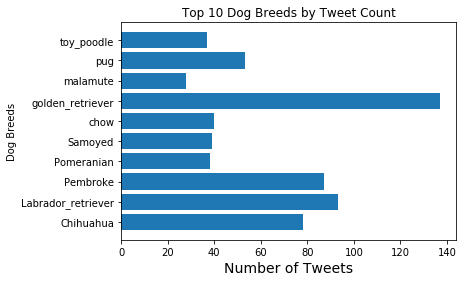

In [51]:
plt.barh(top10_breeds_count.index, top10_breeds_count)
plt.xlabel('Number of Tweets',fontsize = 14)
plt.ylabel('Dog Breeds')
plt.title('Top 10 Dog Breeds by Tweet Count')

## Which dog stage was favorited and retweeted the most?

In [52]:
df_master.dog_stages.value_counts()

pupper     244
doggo       83
puppo       31
floofer      4
Name: dog_stages, dtype: int64

In [53]:
df_master.groupby(["dog_stages"], as_index=False)['favorite_count', 'retweet_count'].mean().sort_values(by='favorite_count' , ascending = False)

,dog_stages,favorite_count,retweet_count
3,puppo,19236.064516,5321.516129
1,floofer,16328.750000,5748.000000
0,doggo,14506.397590,4726.132530
2,pupper,6239.971311,1998.077869


## Is there a corrleation between favorite count and rating?

In [54]:
#create a column that has the average favorite count for every rating
df_master['count'] = df_master.groupby('rating_out_of_10')['favorite_count'].mean().sort_values(ascending = False)

Text(0.5,1,'Rating vs. Likes ')

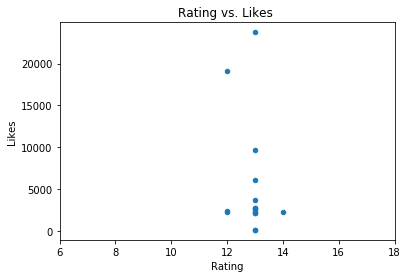

In [55]:
#Make a scatterpot comparing rating and favorite_count
ax = df_master.plot(x='rating_out_of_10', y= 'count', kind='scatter')
ax.set_xlim(6, 18)
plt.xlabel('Rating')
plt.ylabel('Likes')
plt.title('Rating vs. Likes ')

It appears there is little correlation between rating and favorite count.